In [108]:
# Libraries to be used
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



In [109]:
# import dataset
bike_data = pd.read_csv('./Datasets for Assignment 3/bike_data.csv')
bike_data.head()

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,cnt,day
0,1,1,0,7,0,2,14.110847,80.5833,10.749882,31771,985,1
1,1,1,0,1,0,2,14.902598,69.6087,16.652113,32548,801,1
2,1,1,0,2,1,1,8.050924,43.7273,16.636703,59704,1349,1
3,1,1,0,3,1,1,8.200000,59.0435,10.739832,70635,1562,1
4,1,1,0,4,1,1,9.305237,43.6957,12.522300,73744,1600,1


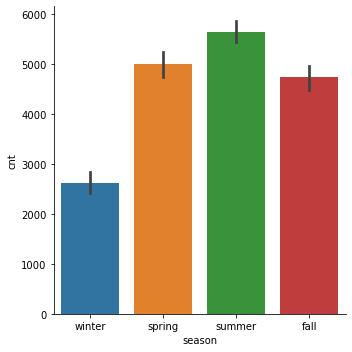

In [110]:
# 1. Relation between cnt and season

a = sns.catplot(
    data=bike_data,
    y="cnt", x="season", 
    kind="bar")

a.set_xticklabels(['winter', 'spring', 'summer', 'fall'])
plt.show()

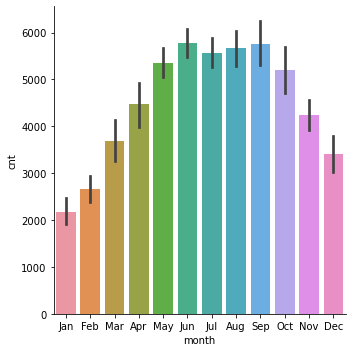

In [111]:
# Relation between cnt and month

a = sns.catplot(
    data=bike_data,
    y="cnt", x="month", 
    kind="bar")

a.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

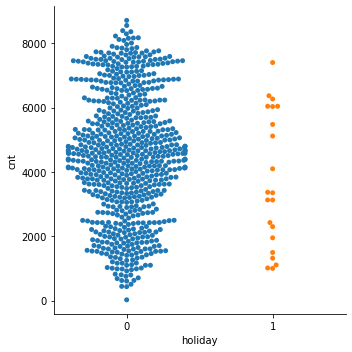

In [112]:
# Relation between cnt and weekday

sns.catplot(
    data=bike_data,
    y="cnt", x="holiday", 
    kind="swarm")
plt.show()

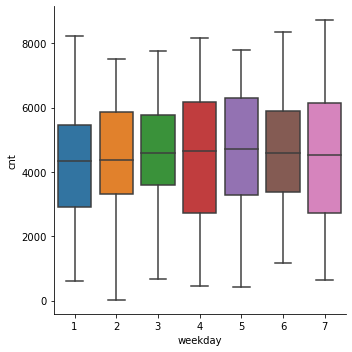

In [113]:
# Relation between cnt and weekday

sns.catplot(
    data=bike_data,
    y="cnt", x="weekday", 
    kind="box")
plt.show()

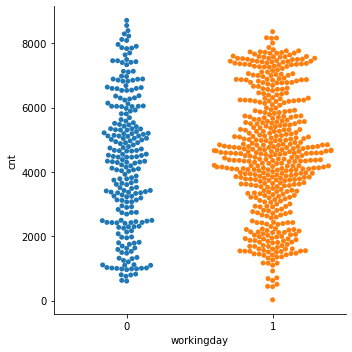

In [114]:

# Relation between cnt and Workingday

sns.catplot(
    data=bike_data,
    y="cnt", x="workingday", 
    kind="swarm")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


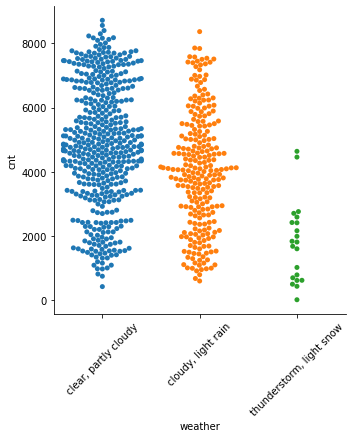

In [115]:
# Relation between cnt and weather

a = sns.catplot(
    data=bike_data,
    y="cnt", x="weather", 
    kind="swarm")

a.set_xticklabels(rotation=45)
a.set_xticklabels(['clear, partly cloudy', 'cloudy, light rain','thunderstorm, light snow'])
plt.show()

In [117]:
# Calculating correlation between cnt and other variables
corrs = bike_data.corr()['cnt'][['month', 'holiday', 'weekday', 'workingday']]

print('Correlation between cnt and other variables')
print(corrs)

Correlation between cnt and other variables
month         0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
Name: cnt, dtype: float64


In [119]:
# Build a regression model that the company can use to predict the count of total rental bikes
# based on (i) workingday (ii) temperature

X = bike_data[['workingday', 'temp']]
Y = bike_data['cnt']

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [120]:
# getting the coefficient value
coef = model.coef_

# getting the interception value
intercept = model.intercept_

# calculate the predict value with the help of coef, intercept values
non_workindday_with_20Deg = (coef[0] * 0) + (coef[1] * 20) + intercept 
workindday_with_20Deg = (coef[0] * 1) + (coef[1] * 20) + intercept 

# calculate the predict value with buildin predict function
non_workindday_with_25Deg = model.predict([[0,25]]) 
workindday_with_25Deg = model.predict([[1,25]])

# Print the result
print(f'Non working day with 20 degree need {math.floor( non_workindday_with_20Deg)} bikes')
print(f'Working day with 20 degree need { math.floor( workindday_with_20Deg)} bikes')
print(f'Non working day with 25 degree need {math.floor( non_workindday_with_25Deg)} bikes')
print(f'working day with 25 degree need {math.floor( workindday_with_25Deg)} bikes')

Non working day with 20 degree need 4373 bikes
Working day with 20 degree need 4494 bikes
Non working day with 25 degree need 5180 bikes
working day with 25 degree need 5301 bikes
